### Road Sign Classifier(CNN)

**Loading dataset into a directory**

In [8]:
!wget http://www.lawrence.edu/fast/greggj/CMSC490/Signs.zip
!wget http://www.lawrence.edu/fast/greggj/CMSC490/Signs_Test.zip
!unzip Signs.zip
!unzip Signs_Test.zip

URL transformed to HTTPS due to an HSTS policy
--2023-10-03 22:03:29--  https://www.lawrence.edu/fast/greggj/CMSC490/Signs.zip
Resolving www.lawrence.edu (www.lawrence.edu)... 143.44.124.14
Connecting to www.lawrence.edu (www.lawrence.edu)|143.44.124.14|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www7.lawrence.edu/fast/greggj/CMSC490/Signs.zip [following]
--2023-10-03 22:03:29--  https://www7.lawrence.edu/fast/greggj/CMSC490/Signs.zip
Resolving www7.lawrence.edu (www7.lawrence.edu)... 143.44.124.14
Connecting to www7.lawrence.edu (www7.lawrence.edu)|143.44.124.14|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.lawrence.edu/fast/greggj/CMSC490/Signs.zip [following]
--2023-10-03 22:03:30--  https://www2.lawrence.edu/fast/greggj/CMSC490/Signs.zip
Resolving www2.lawrence.edu (www2.lawrence.edu)... 143.44.124.14
Connecting to www2.lawrence.edu (www2.lawrence.edu)|143.44.124.14|:443... connecte

In [2]:
!ls

annotations		  DiabetesClassifier.ipynb  signs_small
annotations.tar.gz	  images		    Signs_Test.zip
cats_vs_dogs_small	  images.tar.gz		    Signs.zip
cats_vs_dogs_small.zip	  professorexample.ipynb    snap
convnet_from_scratch.mdl  Signs			    Test


**Looking at how listdir function works**

In [3]:
import os,random

files = os.listdir("Test/0")
random.shuffle(files)
print(len(files)/2)
files

30.0


['03420.png',
 '10049.png',
 '03009.png',
 '05945.png',
 '09117.png',
 '06946.png',
 '04726.png',
 '02752.png',
 '03677.png',
 '07712.png',
 '00807.png',
 '00990.png',
 '11812.png',
 '11790.png',
 '11873.png',
 '02045.png',
 '04333.png',
 '00809.png',
 '10406.png',
 '03340.png',
 '03922.png',
 '02160.png',
 '10536.png',
 '06854.png',
 '00579.png',
 '00243.png',
 '00252.png',
 '04332.png',
 '01519.png',
 '04512.png',
 '11771.png',
 '01853.png',
 '06639.png',
 '04012.png',
 '11718.png',
 '03776.png',
 '06421.png',
 '06002.png',
 '10381.png',
 '00778.png',
 '06116.png',
 '00675.png',
 '06518.png',
 '04504.png',
 '03863.png',
 '04795.png',
 '11804.png',
 '04180.png',
 '03779.png',
 '02930.png',
 '12614.png',
 '03474.png',
 '03281.png',
 '01279.png',
 '06333.png',
 '00943.png',
 '04605.png',
 '00403.png',
 '04570.png',
 '04434.png']

**Slicing the Test dataset into a Validation dataset and the (actual)test dataset**

In [35]:
import os, shutil, pathlib

original_dir = pathlib.Path("Test")
new_base_dir_1 = pathlib.Path("Validation")
new_base_dir_2 = pathlib.Path("test")


for n in range(0,43):
    files = os.listdir(original_dir / str(n))
    random.shuffle(files)
    os.makedirs(new_base_dir_1 / str(n))
    for f in (files[:len(files)//2]):
        shutil.copyfile(src=original_dir / str(n) / f,
                        dst=new_base_dir_1 / str(n) / f)
    os.makedirs(new_base_dir_2 / str(n))
    for f in (files[len(files)//2:]):
        shutil.copyfile(src=original_dir / str(n) / f,
                        dst=new_base_dir_2 / str(n) / f)

In [36]:
!ls test/27

00018.png  02748.png  05057.png  08042.png  09158.png  10100.png
00610.png  03564.png  05518.png  08422.png  09418.png  10367.png
00960.png  04048.png  06038.png  08574.png  09509.png  10878.png
01699.png  04562.png  06612.png  08585.png  09547.png  11415.png
01840.png  04697.png  07225.png  08740.png  10000.png  11851.png


**Building the model**

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(43, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [38]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

**Loading the dataset from directory**

In [45]:
from tensorflow.keras.utils import image_dataset_from_directory

original_dir_2 = pathlib.Path("Signs")
train_dataset = image_dataset_from_directory(
    original_dir_2,
    image_size=(180, 180),
    batch_size=32,
    label_mode="categorical")
validation_dataset = image_dataset_from_directory(
    new_base_dir_1,
    image_size=(180, 180),
    batch_size=32,
    label_mode="categorical")
test_dataset = image_dataset_from_directory(
    new_base_dir_2,
    image_size=(180, 180),
    batch_size=32,
    label_mode="categorical")

Found 39209 files belonging to 43 classes.
Found 6315 files belonging to 43 classes.
Found 6315 files belonging to 43 classes.


In [46]:
for images, labels in train_dataset:
    print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")

Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (32, 43)
Images shape: (32, 180, 180, 3), Labels shape: (

**Compiling the model**

In [47]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.mdl",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
1226/1226 [==============================] - ETA: 0s - loss: 0.0956 - accuracy: 0.9768INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


1226/1226 [==============================] - 17s 14ms/step - loss: 0.0956 - accuracy: 0.9768 - val_loss: 0.0343 - val_accuracy: 0.9911
Epoch 2/20
1225/1226 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9948INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


1226/1226 [==============================] - 17s 14ms/step - loss: 0.0203 - accuracy: 0.9948 - val_loss: 0.0317 - val_accuracy: 0.9914
Epoch 3/20
1226/1226 [==============================] - 16s 13ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.1193 - val_accuracy: 0.9712
Epoch 4/20
1226/1226 [==============================] - 16s 13ms/step - loss: 0.0154 - accuracy: 0.9955 - val_loss: 0.0636 - val_accuracy: 0.9842
Epoch 5/20
1226/1226 [==============================] - 17s 13ms/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.0791 - val_accuracy: 0.9819
Epoch 6/20
1226/1226 [==============================] - 16s 13ms/step - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.0766 - val_accuracy: 0.9853
Epoch 7/20
1226/1226 [==============================] - 16s 13ms/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.0845 - val_accuracy: 0.9821
Epoch 8/20
1226/1226 [==============================] - 17s 14ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.1078 - val_accura

**Plotting the result**

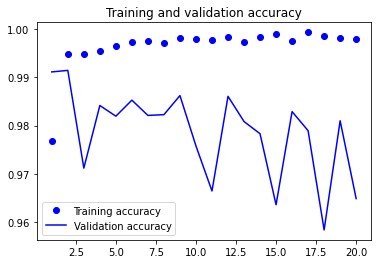

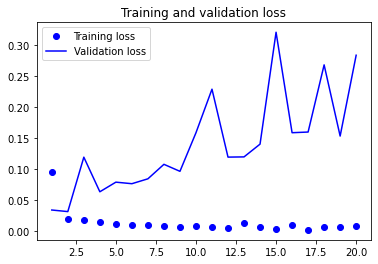

In [48]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()